<a href="https://colab.research.google.com/github/mariatozi/codigos-estudos/blob/main/Chamados2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [51]:
df_julho = pd.read_excel('dados-novos.xlsx')

In [52]:
def substituir_valor(texto):
        # pesquisa de satisfação
    if texto in ['Ligação presa após transferência para pesquisa e caiu',
                 'Ao encaminhar para a pesquisa, a mesma retornou (fluxo pesquisa de satisfação)',
                 'A pesquisa voltou para o ramal da agente', 'Falha(*): ura de pesquisa satisfaçao',
                 'Retorno da pesquisa de satisfação']:
        return 'Fluxo falha pesquisa de satisfação'

        # queda de ligação
    elif texto in ['QUEDA NA LIGAÇÃO', 'Ligação caiu durante o atendimento',
                   'Queda na ligação ', 'Falha(*): queda na ligação',
                   'ligação caiu', 'Queda de ligação', 'Falha(*): Queda de ligação',
                   'ligação caiu ', ' queda na ligação', 'Falha(*):queda na ligação',
                   'Falha(*): ligação caiu ', 'Falha(*): ligaçao caiu  ',
                   'Falha(*):  Queda de Ligação', 'Falha(*): queda da ligação ',
                   'Falha(*): Queda na ligação ', 'Falha(*): ligação caiu',
                   'motivo: Queda de ligação', 'Falha(*): queda na ligaçao',
                   'Motivo: Ligação caiu', 'Falha(*)queda na ligação',
                   'Falha(*): ligação caiu 16636476', 'queda na ligação.',
                   'Falha(*): queda na ligação 16665068', 'queda na ligação 16670834',
                   'Motivo: Queda de ligação (15997032083)', 'Falha(*): ligação robótica/queda na ligação',
                   'Queda na ligação (robotizada)', 'queda na ligação queda na ligação',
                   'Falha(*): queda ligação', 'ligaçao caiu ', 'Queda na ligação (falha)',
                   'queda na ligação 16668908', 'queda na ligação, durante att 16672171',
                   'queda na linha ', 'Falha(*):  Ligação caiu', 'Falha(*): Queda de ligação.',
                   'Falha(*): queda na linha ', 'Ligação caiu/Sem retorno de voz;',
                   'Falha(*) queda na ligação', 'Falha(*): liçaão caiu ou foi desconectada',
                   '( X) Durante o atendimento: Ligação caiu/Sem retorno de voz',
                   '( x ) Durante o atendimento: Ligação caiu/Sem retorno de voz',
                   'ligação sem retorno de voz, queda na ligação',
                   'queda na ligação na parte questionario', 'ligação caiu durante o atendimento ',
                   'Falha(*): Queda na ligação', 'queda na ligação', 'QUEDA NA LIGAÇÃO']:
        return 'Ligações que tiveram queda (durante ou na finalização)'

        # ligação muda/sem retorno de voz
    elif texto in ['LIGAÇÃO MUDA', 'LIGAÇÃO MUDA - SEM RETORNO DE VOZ',
                   'Ligação muda sem retorno de voz', 'ligação sem retorno de voz',
                   'Ligação desconectada por falta de retorno de voz',
                   'Falha(*): ligação muda', 'Ligação desconectada por falta de comunicação',
                   'Falha(*): ligação muda ', 'sem retorno de voz',
                   '( x ) Ligação entrou muda;', 'desconectei por falta de retorno',
                   '( x ) Ligação desconectada por falta de comunicação; ', 'Ligação Muda ',
                   'Falha(*): sem retorno de voz', 'Falha(*): sem retorno de voz ',
                   'Falha(*):  Ligação muda', 'desconctei por falta de retorno',
                   'Falha(*): SEM RETORNO DE VOZ E QUEDA NA LIGAÇÃO',
                   'Falha(*): sem retorno de voz, feito o script de desconectar.',
                   'Falha(*): Sem retorno do seg após a verificação do att',
                   'ligacao sem retorno de voz 16673884 ',
                   'Ligação ficou muda. Feito desconexão por falta de retorno de voz.',
                   'Ligação muda/sem retorno de voz', 'Falha(*): falta de retorno ',
                   'ligação sem retorno de voz (muda)', 'Ligação sem retorno de voz, feito script de desconexão. ',
                   'Falha(*): Ligação sem retorno de voz', 'Falha(*): falta de retorno de voz',
                   'Ligação com falha e sem retorno de voz', 'Durante a abertura a ligação ficou muda, feito o scrip de falta de retorno de voz',
                   'Ligação entrou normal, corretor se apresentou, e no meio a ligação ficou muda (feito script de desconexão)',
                   'Ligação ficou muda com falha', 'Falha(*):ligação muda', 'ligação muda no script final ',
                   'Ligação ficou muda e seguiu com o script de desconexão', 'Ligação muda e script de desconexão feito',
                   'gação muda/ sem retorno de voz', 'Ligação ficou muda durante o atendimento.',
                   'Falha(*): ligação ficou muda durante abertura do atendimento',
                   'Falha(*): ligação ficou muda durante o atendimento',
                   'Ligação muda durante atendimento', 'Falha(*): liçaão ficou muda na coleta do local',
                   'Ligação entrou muda no ramal (feito script de desconexão)', 'Falha(*): Ligação muda',
                   'Falha(*): Ligação muda']:
        return 'Ligações mudas e/ou sem retorno de voz'

        # falhas reportadas durante o atendimento
    elif texto in ['Ligação caiu durante o atendimento;',
                   '( x ) Ligação caiu durante o atendimento;', 'Durante o atendimento: Ligação caiu/Sem retorno de voz',
                   '(x ) Ligação caiu durante o atendimento;', 'Ligação caiu/sem retorno de voz durante o atendimento',
                   'Falha(*): ligação caiu enquanto finalizava att', 'Ligaçao caiu durante o atendimento  ',
                   'Falha(*): ligação caiu enquanto solicitava informações de contato  ',
                   'ligação ficou muda durante atendimento', 'Falha(*): Ligação caiu durante a coleta dos dados',
                   'Queda na ligação durante o atendimento',
                   'Estava formalizando o att e houve queda de ligação.', '(x  ) Ligação caiu durante o atendimento;',
                   'Ligação ficou muda durante o atendimento', 'Falha(*): Ligação caiu enquanto a corr falava',
                   'Falha(*): queda na ligação durante abertura do atendimento',
                   'Falha(*):  NA ABERTURA DO ATT, (NO GABARITO) A LIGAÇÃO CIAU',
                   'Falha(*): ligação caiu enquanto solicitava data do dano ',
                   'Falha(*): Ao solicitar a data do ocorrido, houve queda na ligação.',
                   'Falha(*):ligação caiu antes de formalizar o att',
                   '( x) Ligação caiu durante o atendimento;', 'Falha(*): ligação caiu enquanto finalizava atendimento  ',
                   'Falha(*): caiu na hr de coletar o dano', 'Ligação muda no final do atendimento',
                   'queda na ligação antes de finalizar', 'Falha(*): ligação caiu enquanto iniciava abertura ',
                   '(  X) Durante o atendimento: Ligação caiu/Sem retorno de voz',
                   'ligação caiu antes de finalizar', 'Ligação caiu antes de formalizar att',
                   'Ligação caiu durante o atendimento, sem retorno', 'Ligação caiu durante o atendimento; ',
                   'Ligação caiu na finalização', 'Ligação caiu durante o atendimento']:
        return 'Falha nas ligações que ocorreram durante o atendimento (mudas ou caindo)'

        # cliente
    elif texto in ['Abandono em linha pelo cliente', 'cliente desconectou',
                   'Segurado desligou', 'Falha(*): seg desconectou ',
                   'Falha(*):corr desligou ', 'Segurado desconectou',
                   'Falha(*): seg desconectou', 'Falha(*): Seg desconectou a ligação',
                   'Falha(*): seg desligou ', 'Falha(*): segurado desligou',
                   'seg desligou', 'Falha(*):corr desligou 16337395',
                   'Falha(*): ligação ruim, seg desconectou', 'corr desligou',
                   'Falha(*): Ligação ficou falhando e depois muda, corr desligou',
                   'Seg pediu um momento e desconetou',
                   'Falha(*):  Ao passar o n° da cia o seg desconectou a ligação',
                   'Falha(*): Corr ligou, porem nao conseguiu me ouvir e desligou',
                   'Falha(*): crr desconectou antes de enviar para pesquisa',
                   'Corretor desligou', 'Falha(*): desconectado pelo segurado para pesquisa',
                   'seg desligou ', 'Segurado com dificuldade de desconectar',
                   'Falha(*):  Corr desconectou', 'Falha(*): queda da ligação - DESCONEXÃO DO SEG ',
                   'Falha(*): Ligação desconectada durante informação de 0800',
                   'Falha(*): Durante a coleta dos numeros de ctt, a ligação ficou muda e nao consegui mais retorno, seg desligou.']:
        return 'Abandono ou desconexão realizada em linha pelo cliente'

        # aplicação e demais
    elif texto in ['Erro no Venus', 'Erro StartPhone',
                   'Vênus encerrou e desconectou o STARTPHONE',
                   'Erro no Horizon', 'Falha(*): start desconectou',
                   'Sistema deslogou durante almoço',
                   'Não foi possível tabular a chamada','Sistema deslogou durante o almoço',
                   'Erro no vênus', 'Erro no Horizon / O código do incidente: 1418549; Falha de acesso a diretório de rede (falha na vpn)',
                   'Venus travando no atendimento para voucher, varias tentativas sem sucesso. ',
                   'Falha(*): problemas na avaya, tive que desconectar por não ouvir mais o seg',
                   'Erro na transferência/tabulação', 'Erro no Avaya', 'Falha(*): START DESCONECTOU']:
        return 'Fluxo de sistemas ou telefonia'

        # falhas aparelhos e home
    elif texto in ['Reiniciou a máquina', 'Travou o computador e a agente teve que reiniciar',
                   'Máquina travando', 'Falha(*): Cabo do telefone deu mal contato , atendi a ligação com atraso ']:
        return 'Falhas nos itens físicos ou Falhas HomeBased'

        # internet
    elif texto in ['Queda na internet', 'Queda de energia']:
        return 'Queda de energia/internet'

        # URA
    elif texto in ['Ligação entrou muda', 'Ligação entrou muda na URA e caiu',
                   'Ligação entrou muda na URA', 'ligação caiu ao entrar na URA',
                   'ura caiu muda, chamei 4 a 5x e fiz script de desconexão',
                   'ura caiu, falou porto e desligou', 'Caiu na Ura',
                   'Falha(*): ligação entrou muda', 'Falha(*): ligação entrou muda ',
                   'Falha(*): ligação entrou sem retorno de voz',
                   'Queda na ligação após entrar na URA', '(x) Ligação entrou muda;',
                   'Falha(*): entrou sem retorno de voz a ligação ',
                   '(X ) Ligação entrou muda;', 'Queda da ligação ainda na URA',
                   'queda na ligação quando entrou na URA', 'Ligação com música gravada',
                   'Ura caiu, falou  só que estava sem retorno de voz, a ligação foi desligada pelo terceiro',
                   'ligacao caiu na ura e caiu a chamafa ', 'tocou no ramal e caiu',
                   'Ligação entrou muda;', 'Ligação caiu ao entrar na URA (seguiu script de desconexão)',
                   'Ligação entrou muda no ramal (feito script de desconexão)']:
        return 'Falha nas ligações ao entrar na URA - Comportamento Call Center'

        # ligações falhando
    elif texto in ['ligação com interferência seguida de queda.',
                   'Ligação com ruído e queda na chamada',
                   'Ligação falhando durante o atendimento', 'Ligação falhando e desconectada']:
        return 'Ligações com falhas ou ruídos'

        # outros
    elif texto in ['SEM INFORMAÇÕES', 'Ligação no início do att',
                   'Outros - Mande pro Líder com detalhes', 'Falha(*)dificuldade em desconectar',
                   'desconexão']:
        return 'Registros com dados incompletos ou não identificados'

        # ligação muda e em seguida queda
    elif texto in ['Ligação ficou muda e caiu durante atendimento.',
                   'Ligação ficou muda e caiu durante o atendimento', 'ligação muda e queda na ligação',
                   'Falha(*): Ligação ficou muda e caiu', 'Falha(*): ligação ficou muda e caiu ',
                   'Ligação Muda e Queda de ligação', 'Falha(*):ligação ficou muda e teve queda na ligação',
                   'Falha(*):ligação muda/queda na ligação', 'Falha(*): ligação muda seguida de queda',
                   'Ligação muda seguida de queda',
                   'enquanto estava mandando mensagem para o analista, a ligação ficou muda olhei o telefone e estava dando transferencia concluida.Lider Anne acompanhou',
                   'Falha(*): Durante a coleta dos numeros de ctt, a ligação ficou muda e caiu']:
        return 'Ligações que ficaram mudas e cairam direto'

    else:
        return 'vazias-verificar'

In [53]:
df_julho['Desc-tratado'] = df_julho['Descrição'].apply(substituir_valor)

In [54]:
df_julho

,Unnamed: 0,Problema,Mês,Colaborador-nome-ajustado,Agente,Horário,Descrição,Desc-tratado
0,0,2023-07-17,julho,Emanuely de Oliveira Rocha,31155,13:00:00,QUEDA NA LIGAÇÃO,Ligações que tiveram queda (durante ou na fina...
1,1,2023-07-17,julho,Francisco Vaz Moreira Ripardo,31013,11:31:00,QUEDA NA LIGAÇÃO,Ligações que tiveram queda (durante ou na fina...
2,2,2023-07-17,julho,Francisco Vaz Moreira Ripardo,31013,13:13:00,QUEDA NA LIGAÇÃO,Ligações que tiveram queda (durante ou na fina...
3,3,2023-07-17,julho,Gabriel Rodrigues Lemos,31036,09:07:00,QUEDA NA LIGAÇÃO,Ligações que tiveram queda (durante ou na fina...
4,4,2023-07-17,julho,Gabriel Rodrigues Lemos,31036,14:55:00,QUEDA NA LIGAÇÃO,Ligações que tiveram queda (durante ou na fina...
...,...,...,...,...,...,...,...,...
1094,1094,2023-07-24,julho,Camila Almeida Dias,30203,16:00:00,Ligação caiu durante o atendimento,Ligações que tiveram queda (durante ou na fina...
1095,1095,2023-07-24,julho,Thamiris Passos Silva,30973,16:25:00,Ligação caiu durante o atendimento,Ligações que tiveram queda (durante ou na fina...
1096,1096,2023-07-24,julho,Luiza Helena dos Santos Falcao,31072,17:05:00,Ligação muda,vazias-verificar
1097,1097,2023-07-24,julho,Luiza Helena dos Santos Falcao,31072,17:10:00,Ligação muda,vazias-verificar


In [55]:
df_julho.to_excel('InfoNovo.xlsx')

In [58]:
# Contar a frequência de valores em uma coluna

contagem_valores = df_julho['Desc-tratado'].value_counts().head(9)
print(contagem_valores)

Ligações que tiveram queda (durante ou na finalização)                      462
vazias-verificar                                                            191
Ligações mudas e/ou sem retorno de voz                                      104
Fluxo de sistemas ou telefonia                                               87
Falha nas ligações que ocorreram durante o atendimento (mudas ou caindo)     69
Abandono ou desconexão realizada em linha pelo cliente                       65
Falha nas ligações ao entrar na URA - Comportamento Call Center              44
Ligações que ficaram mudas e cairam direto                                   34
Queda de energia/internet                                                    20
Name: Desc-tratado, dtype: int64


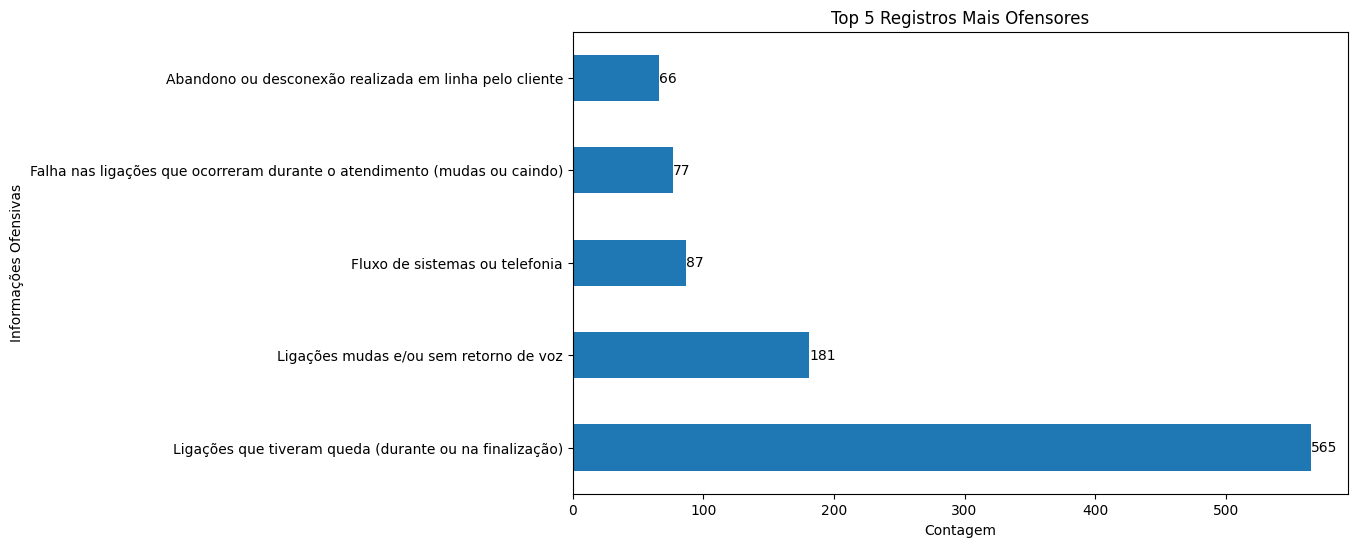

In [62]:
# Carregar o arquivo Excel em um DataFrame
caminho_arquivo = 'dados-novos.xlsx'
df = pd.read_excel(caminho_arquivo)

# Selecionar a coluna com informações ofensivas
coluna_ofensiva = 'Desc-tratado'  # Substitua pelo nome da coluna com informações ofensivas
df_ofensas = df[coluna_ofensiva]

# Contar a frequência das informações ofensivas
contagem_ofensas = df_ofensas.value_counts().head(5)

# Criar um gráfico de barras horizontais para os 10 registros mais ofensores
plt.figure(figsize=(10, 6))
ax = contagem_ofensas.sort_values().plot(kind='barh')
plt.xlabel('Contagem')
plt.ylabel('Informações Ofensivas')
plt.title('Top 5 Registros Mais Ofensores')

# Adicionar rótulos de dados nas barras do gráfico
ax.bar_label(ax.containers[0])

plt.gca().invert_yaxis()  # Inverter o eixo y para ter o maior valor no topo
plt.show()